# Практика 11

11.1 Найти любой wav файл c музыкальной дорожкой

11.2 Загрузить в блокнот. Построить визуализацию

11.3 Применить фильтрацию Фурье для НЧ, ФЧ фильтров, полосовой фильтр, полосо-заградительный фильтр.

11.4 Применить экспотенциальное сглаживание, двойное экспотенциальное, тройное экспотенциальное сглаживание

11.5 Разобраться в преобразовании Лапласа. Отфильтровать сигнал с помощью фильтра Чебышева (НЧ, ФЧ фильтров, полосовой фильтр, полосо-заградительный фильтр) и Баттерворта.

11.6 Не забываем про визуализацию.

In [240]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment
import seaborn
import pandas as pd
from scipy.fftpack import fft, ifft, fftfreq, rfft, rfftfreq

In [241]:
chordA = "A_chord.wav"
fewChords = "few_chords.wav"

sample_rate, data = wavfile.read(chordA)
duration = len(data) / sample_rate
time = np.arange(0, duration, 1/sample_rate)

channelLeft = data[:,0] #фильтруем данные с левого канала

C:\Users\User\AppData\Local\Temp\ipykernel_3264\2865210579.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read(chordA)


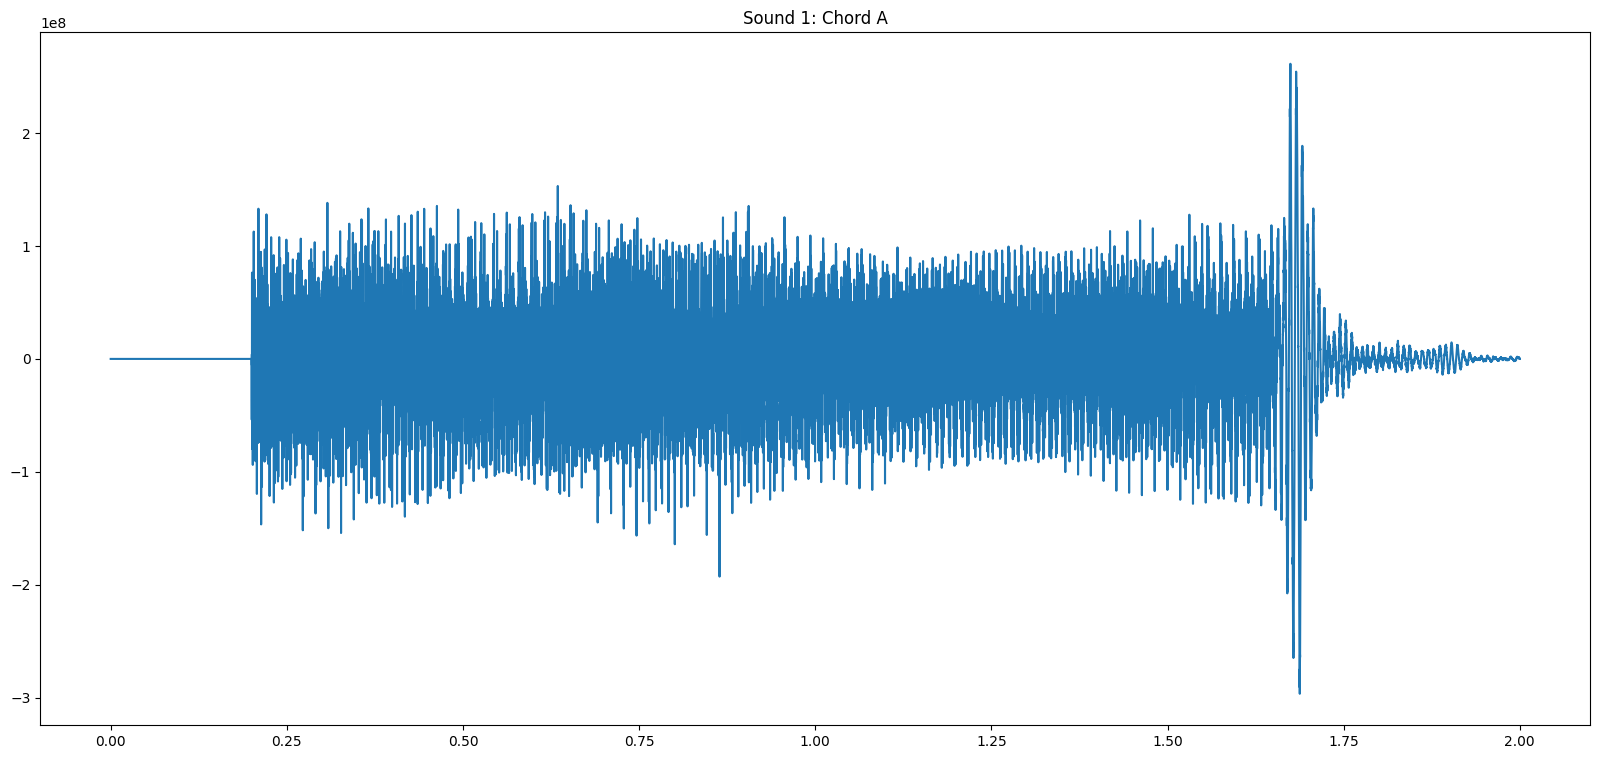

In [242]:
fig = plt.figure(figsize=(20, 9))
plt.plot(time, channelLeft)
plt.title("Sound 1: Chord A")
plt.show()

In [243]:
#Спектр
def spectr(sample_rate, duration, data):
    N1 = int(sample_rate * duration)

    yf1 = fft(data[:, 0])
    xf1 = fftfreq(N1, 1 / sample_rate)

    plt.plot(xf1, np.abs(yf1))
    plt.xlabel('Частота')
    plt.ylabel('Мощность')
    plt.title("Chord A")
    plt.show()

def monoSignalSpectr(sample_rate, duration, monodata):
    N = int(sample_rate * duration)

    yf = rfft(monodata)
    xf = rfftfreq(N, 1 / sample_rate)

    plt.plot(xf, np.abs(yf))
    plt.xlabel('Частота')
    plt.ylabel('Мощность')
    plt.show()

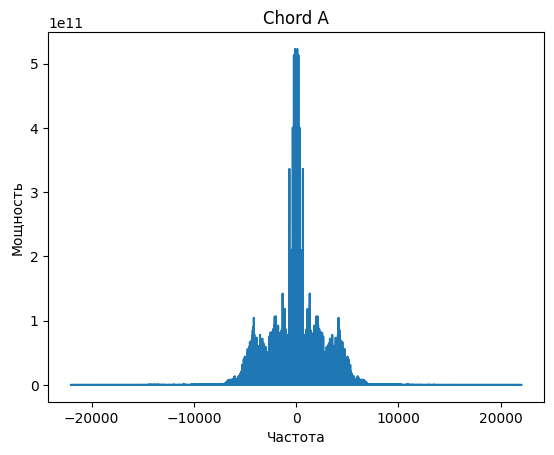

In [244]:
spectr(sample_rate, duration, data)

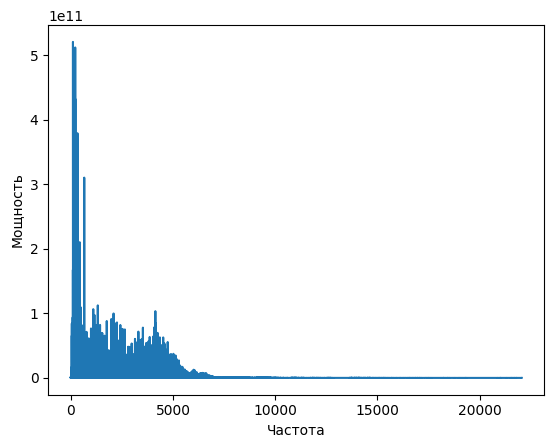

In [245]:
monoSignalSpectr(sample_rate, duration, channelLeft)

In [246]:
#Определяем индексы частот для дальнейшей фильтрации
N = int(sample_rate * duration)
yf = rfft(channelLeft)
xf = rfftfreq(N, 1 / sample_rate)

points_per_freq = len(xf) / (max(xf))
highFreqIndex = int(points_per_freq * 800)
lowFreqIndex = int(points_per_freq * 400)

In [247]:
print(f"{highFreqIndex}, {lowFreqIndex}")

3200, 1600


In [248]:
# Аккорд "А" все еще звучит
sd.play(data[:, 0], sample_rate)
sd.wait()

#### Применить фильтрацию Фурье для НЧ, ФЧ фильтров, полосовой фильтр, полосо-заградительный фильтр.

In [249]:
# Преобразование Фурье
data_rfft = rfft(channelLeft)

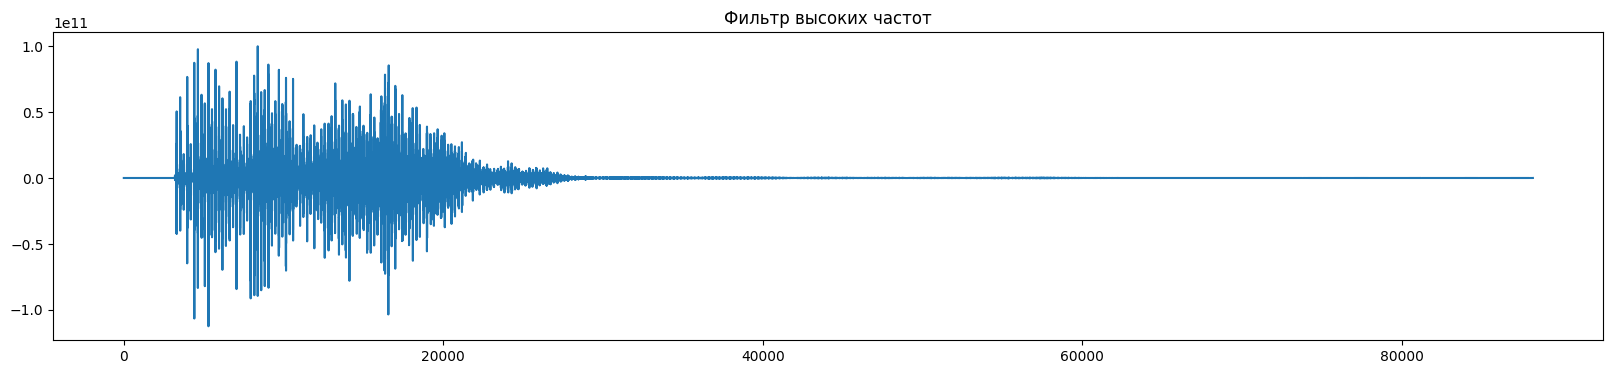

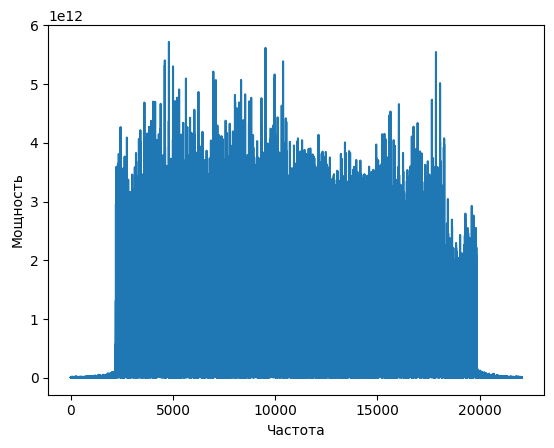

In [250]:
# Фильтр высоких частот
high_passed_fft = data_rfft.copy()
high_passed_fft[:highFreqIndex] = 0

plt.figure(figsize=(20, 4))
plt.plot(high_passed_fft)
plt.title('Фильтр высоких частот')
plt.show()


monoSignalSpectr(sample_rate, duration, high_passed_fft)

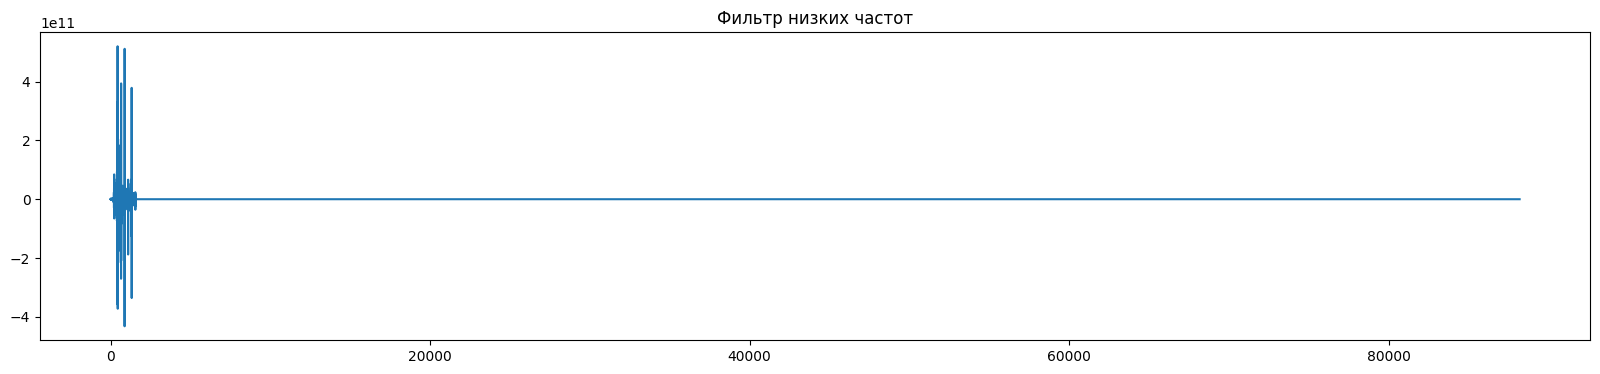

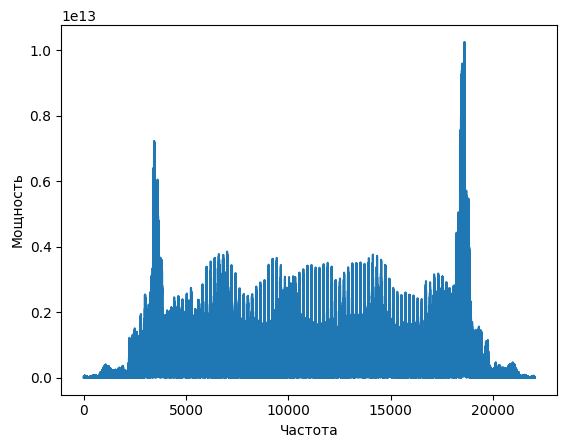

In [251]:
# Фильтр низких частот
low_passed_fft = data_rfft.copy()
low_passed_fft[lowFreqIndex:] = 0

plt.figure(figsize=(20, 4))
plt.plot(low_passed_fft)
plt.title('Фильтр низких частот')
plt.show()


monoSignalSpectr(sample_rate, duration, low_passed_fft)

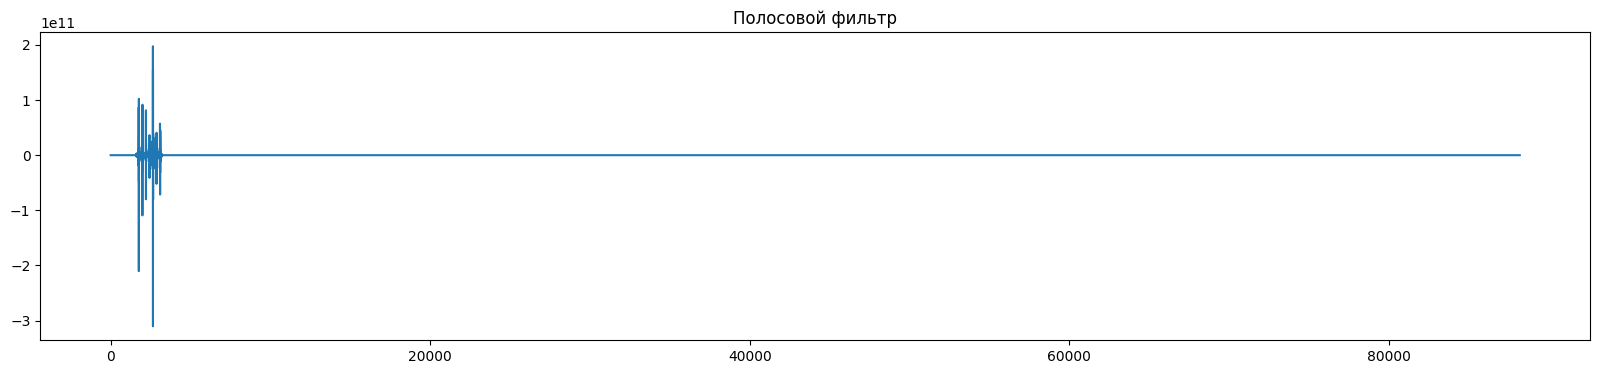

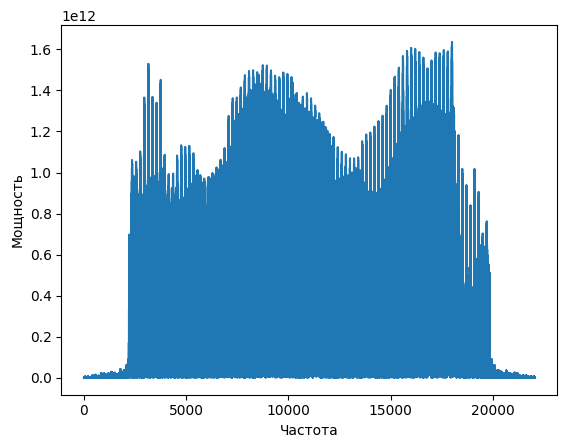

In [252]:
# Полосовой фильтр (Устанавливает амплитуды частот вне диапазона [lowFreqIndex, highFreqIndex] в ноль)
polosk_filtr = data_rfft.copy()
polosk_filtr[:lowFreqIndex] = 0
polosk_filtr[highFreqIndex:] = 0

plt.figure(figsize=(20, 4))
plt.plot(polosk_filtr)
plt.title('Полосовой фильтр')
plt.show()


monoSignalSpectr(sample_rate, duration, polosk_filtr)

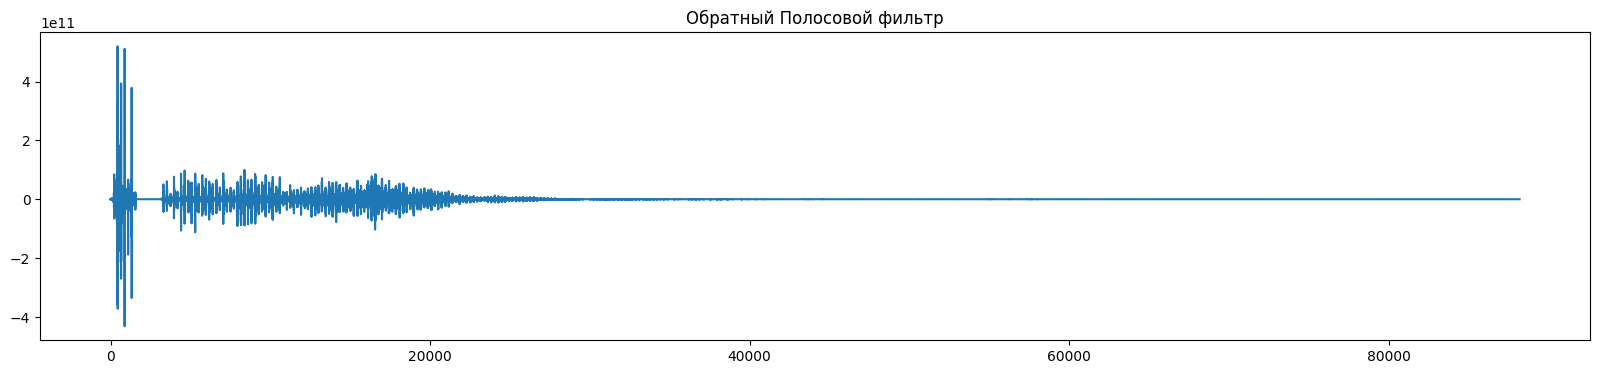

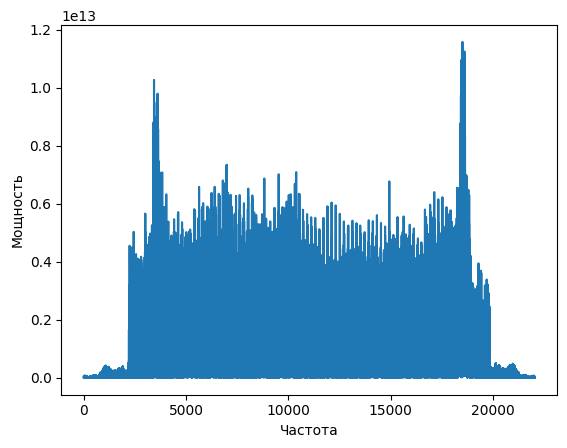

In [253]:
# Обратный Полосовой фильтр (полосо-заградительный фильтр)
reversed_polosk_filtr = data_rfft.copy()
reversed_polosk_filtr = reversed_polosk_filtr - polosk_filtr.copy()

plt.figure(figsize=(20, 4))
plt.plot(reversed_polosk_filtr)
plt.title('Обратный Полосовой фильтр')
plt.show()


monoSignalSpectr(sample_rate, duration, reversed_polosk_filtr)

#### Применить экспотенциальное сглаживание, двойное экспотенциальное, тройное экспотенциальное сглаживание

In [254]:
# Экспоненциальное сглаживание
def exponential_smoothing(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

smoothed = exponential_smoothing(channelLeft, 0.05)

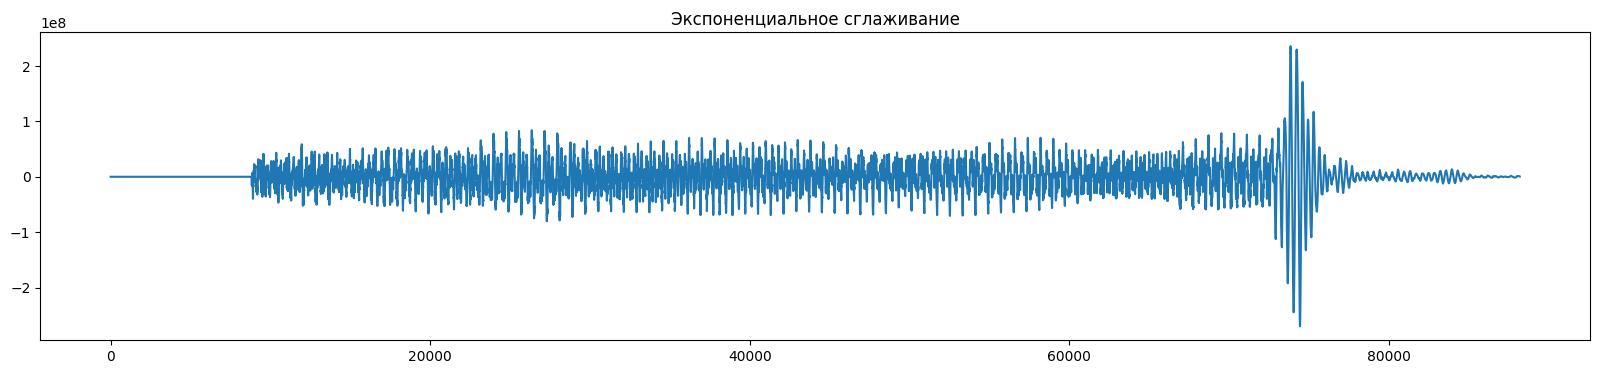

In [255]:
plt.figure(figsize=(20, 4))
plt.plot(smoothed)
plt.title('Экспоненциальное сглаживание')
plt.show()

In [256]:
# Двойное экспоненциальное сглаживание
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series) + 1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series):
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

double_smoothed = double_exponential_smoothing(channelLeft, 0.05, 0.05)

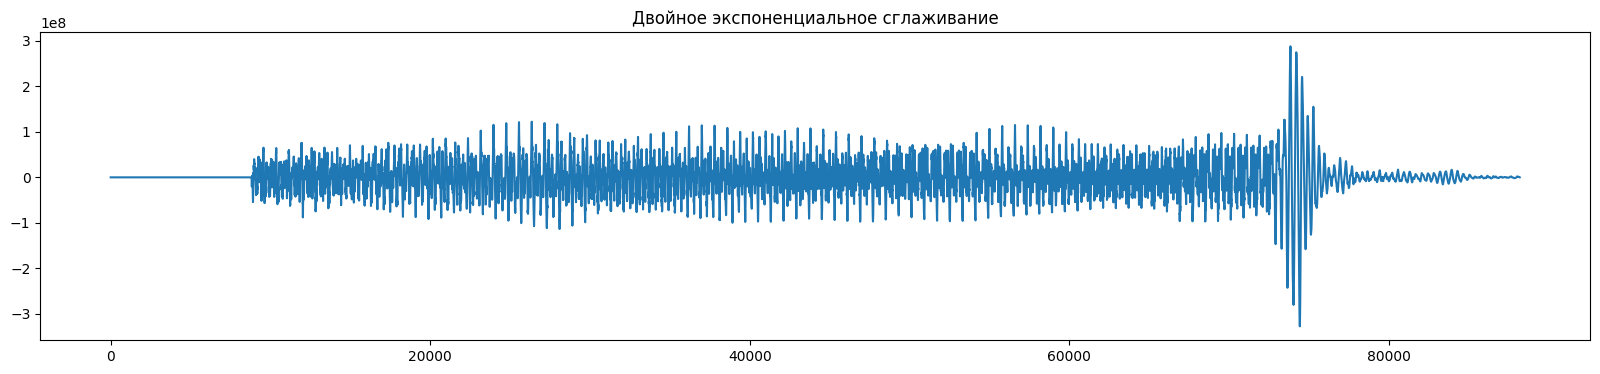

In [257]:
plt.figure(figsize=(20, 4))
plt.plot(double_smoothed)
plt.title('Двойное экспоненциальное сглаживание')
plt.show()

In [258]:
# Тройное экспоненциальное сглаживание
def initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i]) / slen
    return sum / slen

def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # вычисляем сезонные средние
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # вычисляем начальные значения
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # инициализируем значения компонент
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # прогнозируем
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

triple_smoothed = triple_exponential_smoothing(channelLeft, 12, 0.716, 0.029, 0.993, 24)

C:\Users\User\AppData\Local\Temp\ipykernel_3264\553848917.py:14: RuntimeWarning: overflow encountered in scalar add
  season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))


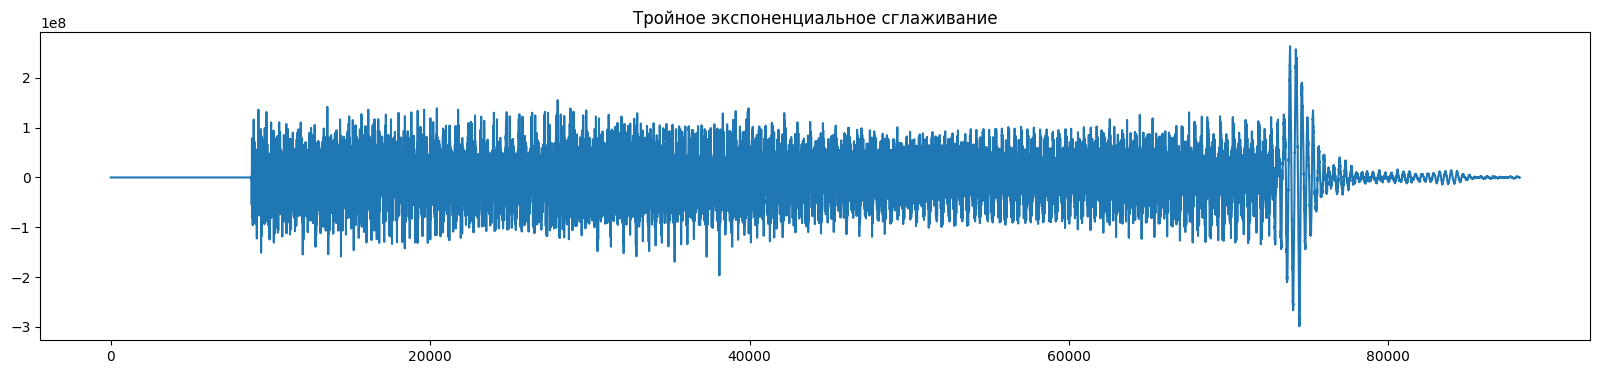

In [259]:
plt.figure(figsize=(20, 4))
plt.plot(triple_smoothed)
plt.title('Тройное экспоненциальное сглаживание')
plt.show()

#### Разобраться в преобразовании Лапласа. Отфильтровать сигнал с помощью фильтра Чебышева (НЧ, ФЧ фильтров, полосовой фильтр, полосо-заградительный фильтр) и Баттерворта.

In [260]:
# Фильтр Чебышева
b, a = signal.cheby1(4, 5, 2000/(sample_rate/2), btype='low') # НЧ фильтр Чебышева с частотой среза 2000 Гц
cheby_low_passed = signal.filtfilt(b, a, channelLeft)

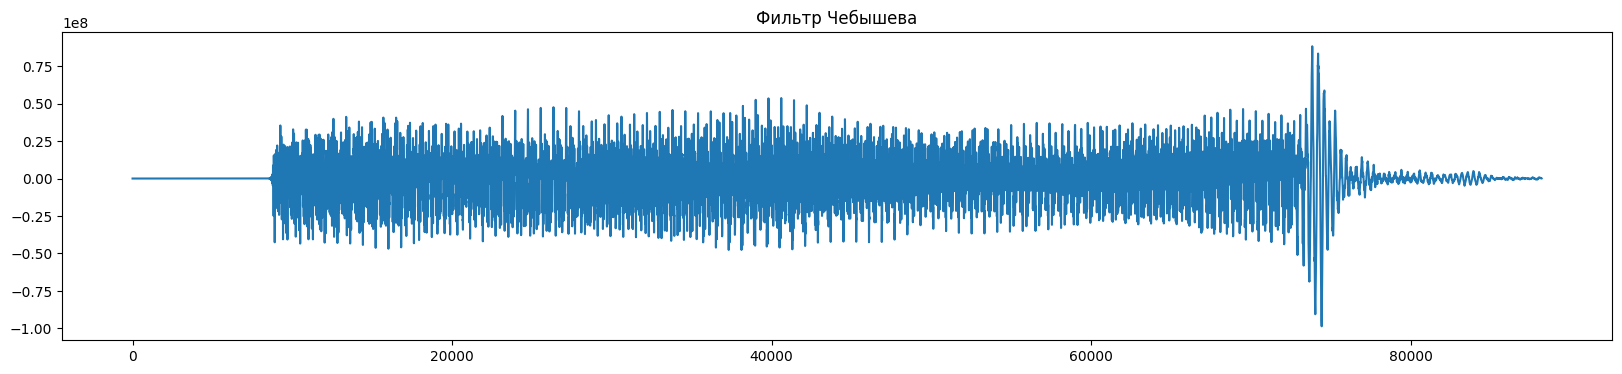

In [261]:
plt.figure(figsize=(20, 4))
plt.plot(cheby_low_passed)
plt.title('Фильтр Чебышева')
plt.show()

In [262]:
# Фильтр Баттерворта
b, a = signal.butter(4, 2000/(sample_rate/2), btype='low') # НЧ фильтр Баттерворта с частотой среза 2000 Гц
butter_low_passed = signal.filtfilt(b, a, channelLeft)

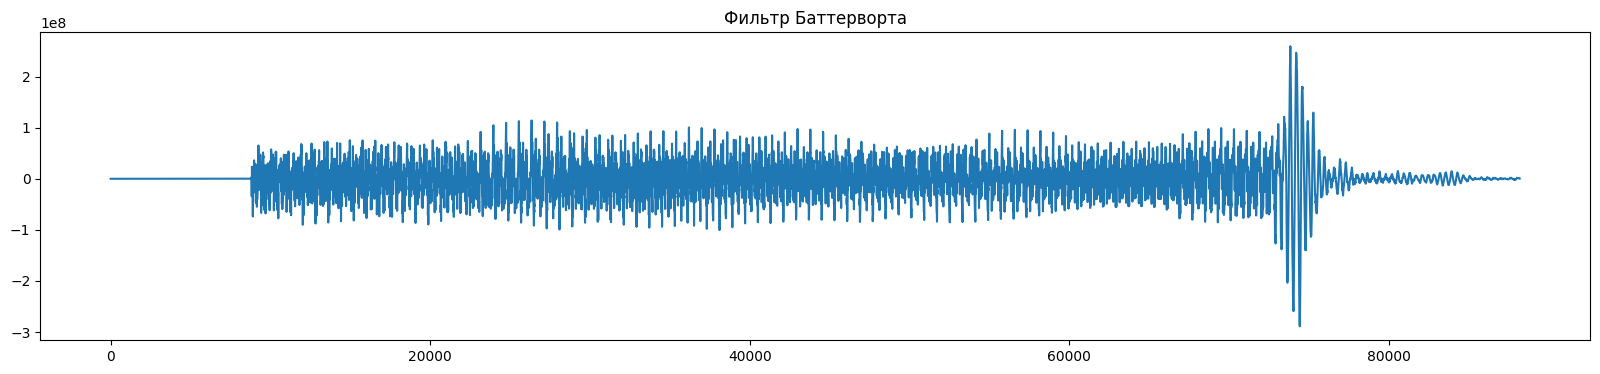

In [263]:
plt.figure(figsize=(20, 4))
plt.plot(butter_low_passed)
plt.title('Фильтр Баттерворта')
plt.show()